<a href="https://colab.research.google.com/github/Jr-RS/Fase5_Cap1_FarmTech-na-era-da-cloud-computing/blob/main/JuniorSilva_rm559451_pbl_fase5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cap 1 - FarmTech na era da cloud computing**

# Import e Configurações

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tratamento dos Dados

In [ ]:
dados =  pd.read_csv('crop_yield.csv')

In [ ]:
dados

,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800
...,...,...,...,...,...,...
151,"Rubber, natural",2308.51,18.27,83.65,26.47,6721
152,"Rubber, natural",2410.13,18.58,83.45,26.81,6248
153,"Rubber, natural",2967.41,18.67,85.48,26.46,6842
154,"Rubber, natural",2333.46,18.50,84.85,26.43,5571


### Informações gerais sobre os dados



In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crop                                  156 non-null    object 
 1   Precipitation (mm day-1)              156 non-null    float64
 2   Specific Humidity at 2 Meters (g/kg)  156 non-null    float64
 3   Relative Humidity at 2 Meters (%)     156 non-null    float64
 4   Temperature at 2 Meters (C)           156 non-null    float64
 5   Yield                                 156 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.4+ KB


### Estatísticas descritivas

In [ ]:
dados.describe()

,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
count,156.000000,156.000000,156.000000,156.00000,156.000000
mean,2486.498974,18.203077,84.737692,26.18359,56153.096154
std,289.457914,0.293923,0.996226,0.26105,70421.958897
min,1934.620000,17.540000,82.110000,25.56000,5249.000000
25%,2302.990000,18.030000,84.120000,26.02000,8327.750000
50%,2424.550000,18.270000,84.850000,26.13000,18871.000000
75%,2718.080000,18.400000,85.510000,26.30000,67518.750000
max,3085.790000,18.700000,86.100000,26.81000,203399.000000


# Análise Exploratória


### Visualização da distribuição dos dados através de histogramas

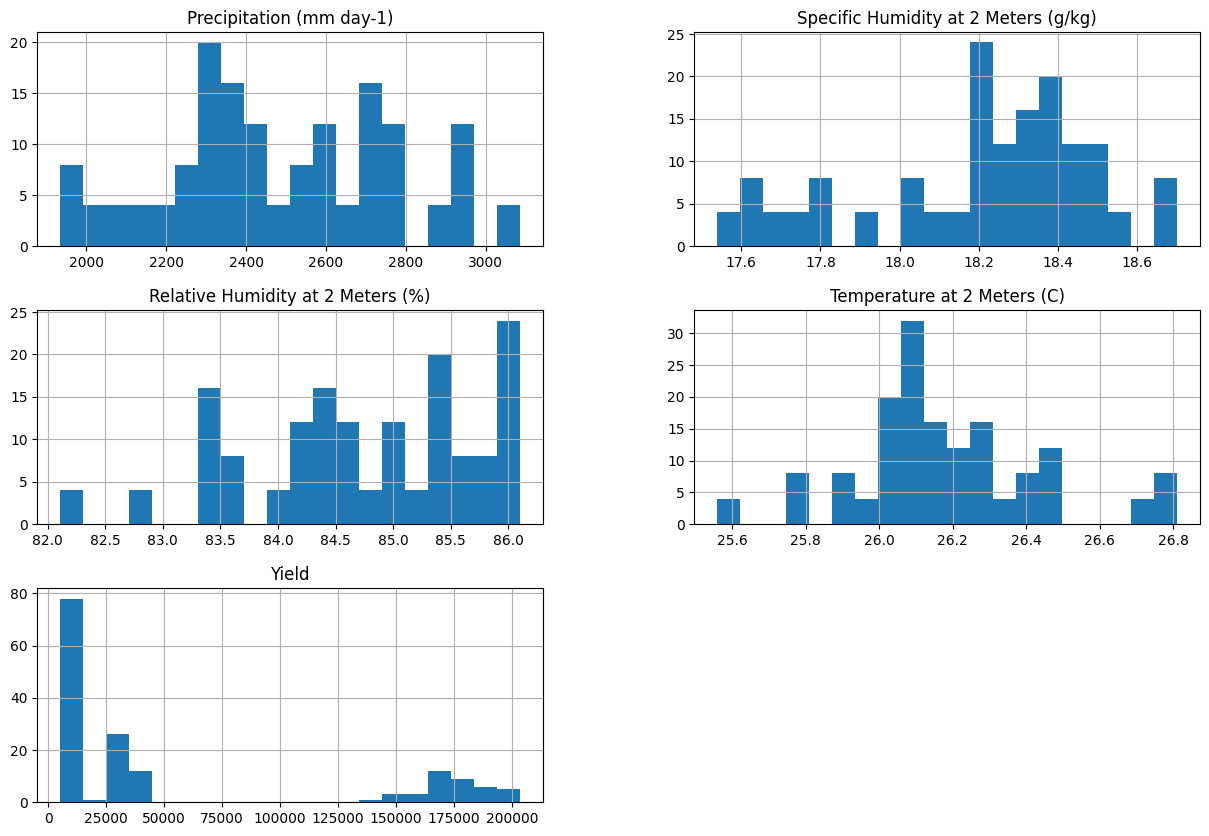

In [ ]:
dados.hist(figsize=(15, 10), bins=20)
plt.show()

Os histogramas mostraram que a maioria das variáveis climáticas (precipitação, umidade e temperatura) possuem distribuições concentradas e com baixa variação. O rendimento agrícola possui uma distribuição altamente assimétrica. Essa diferença do rendimento agrícola em relação às outras variáveis indica que a produtividade das safras não pode ser explicada apenas pelos fatores climáticos disponíveis.


---








### Matriz de Correlação

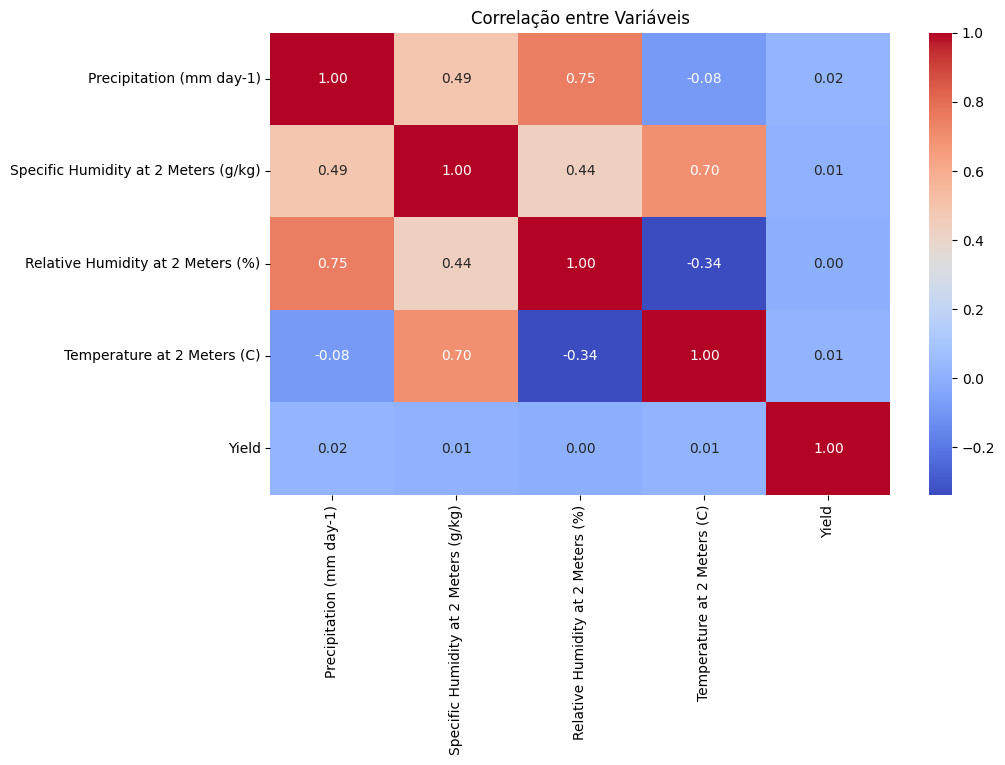

In [ ]:
# Remover colunas não numéricas
df_numeric = dados.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre Variáveis")
plt.show()


Com a matriz de correlação, podemos observar novamente que as variáveis climáticas têm baixa ou moderada correlação entre si e o rendimento agrícola tem correlação fraca com todos os fatores climáticos, sugerindo que outras varíaveis podem ser determinantes na produtividade.

---

### Identificação de Outliers

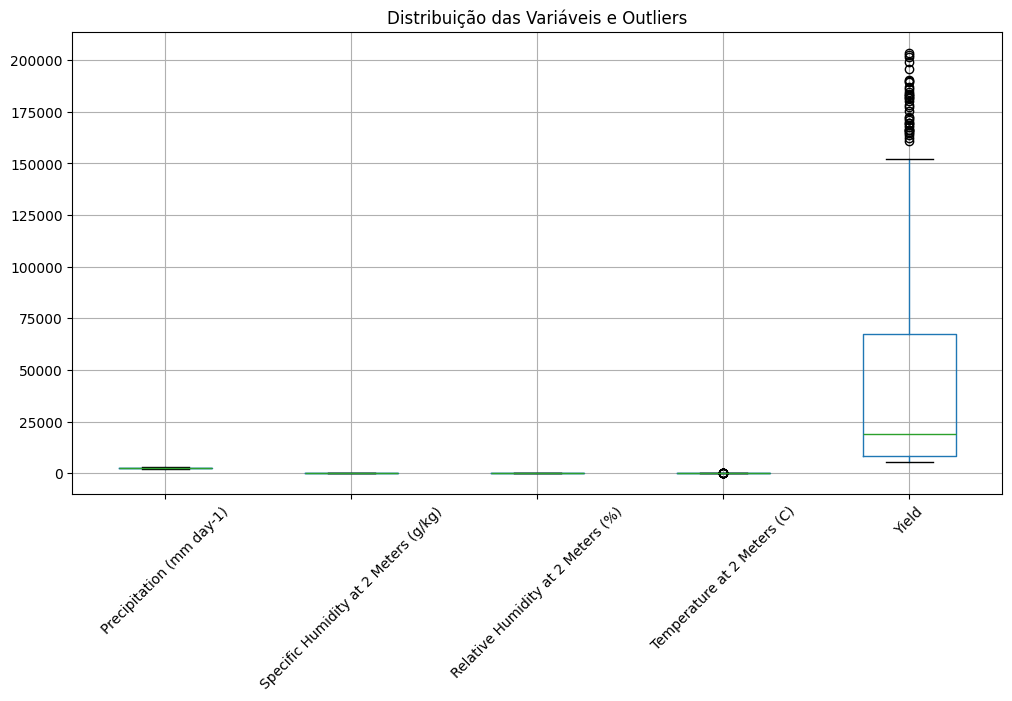

In [ ]:
plt.figure(figsize=(12,6))
dados.boxplot(rot=45)
plt.title("Distribuição das Variáveis e Outliers")
plt.show()

A análise dos bloxplots mostrou que a variável rendimento apresenta diversos outliers, enquanto as variáveis climáticas não possuem valores extremos significativos. Isso confirma que algumas culturas possuem produtividade muito acima ou muito abaixo da média, o que pode indicar diferenças no tipo de culturas analisadas, por exemplo.


---



# Clusterização

### Preparação dos Dados

In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecionar apenas colunas numéricas
df_numeric = dados.select_dtypes(include=['number'])

# Normalizar os dados para evitar escalas diferentes
scaler = StandardScaler()
dados_scaled = scaler.fit_transform(df_numeric)


### K-Means - utilizando o método do cotovelo para encontrar o valor ideal

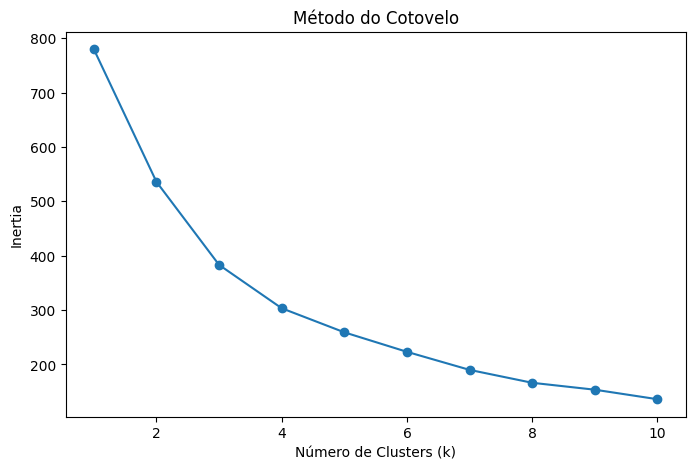

In [ ]:
from sklearn.cluster import KMeans

# Testar diferentes valores de k
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(dados_scaled)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inertia")
plt.title("Método do Cotovelo")
plt.show()


In [ ]:
# Aplicar K-Means com o número ideal de clusters (3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
dados["Cluster_KMeans"] = kmeans.fit_predict(dados_scaled)

# Verificar se os clusters foram criados corretamente
print(dados["Cluster_KMeans"].value_counts())


Cluster_KMeans
0    68
2    44
1    44
Name: count, dtype: int64


O método do cotovelo indicou três clusters como o valor ideal para segmentação dos dados:


*   Cluster 1: Culturas com baixa produtividade (rendimento muito abaixo da média).
*   Cluster 2: Culturas com produtividade intermediária.
*   Cluster 3: Culturas com alta produtividade (rendimento acima de 100.000 toneladas por hectare).






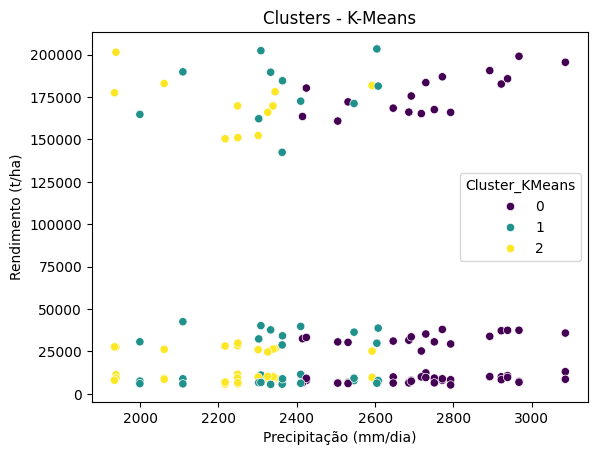

In [ ]:
#Gerando gráfico de Clusters
sns.scatterplot(x=dados["Precipitation (mm day-1)"],
                y=dados["Yield"],
                hue=dados["Cluster_KMeans"],
                palette="viridis")
plt.xlabel("Precipitação (mm/dia)")
plt.ylabel("Rendimento (t/ha)")
plt.title("Clusters - K-Means")
plt.show()


A clusterização K-Means foi aplicada para segmentar as culturas agrícolas com base em suas características climáticas e rendimento. Cada ponto representa uma cultura agrícola analisada.
Os clusters mostram padrões distintos, sugerindo que algumas culturas têm rendimentos naturalmente superiores. A sobreposição de clusters pode indicar que fatores além do clima estão impactando o rendimento agrícola.   

---



### DBSCAN

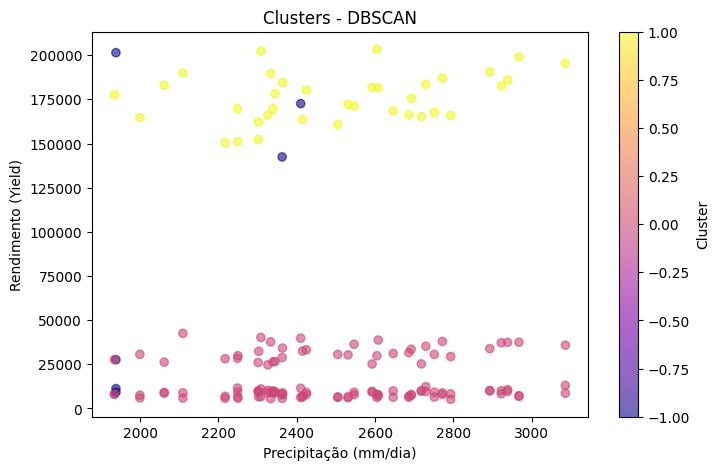

In [ ]:
from sklearn.cluster import DBSCAN

# Escolha dos parâmetros
dbscan = DBSCAN(eps=1.5, min_samples=5)
dados['Cluster_DBSCAN'] = dbscan.fit_predict(dados_scaled)

# Visualizar os clusters
plt.figure(figsize=(8, 5))
plt.scatter(dados['Precipitation (mm day-1)'], dados['Yield'], c=dados['Cluster_DBSCAN'], cmap='plasma', alpha=0.6)
plt.xlabel("Precipitação (mm/dia)")
plt.ylabel("Rendimento (Yield)")
plt.title("Clusters - DBSCAN")
plt.colorbar(label="Cluster")
plt.show()


O DBSCAN foi utilizado afim de detectar padrões sem a necessidade de definir um número fixo de clusters. O algoritmo identificou números menos definidos do que no K-Means, e alguns pontos foram classificados como outliers, reforçando a existência de culturas com rendimento muito fora do padrão.

---



# Treinamento do modelo

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, explained_variance_score, max_error

In [ ]:
dados

,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800
...,...,...,...,...,...,...
151,"Rubber, natural",2308.51,18.27,83.65,26.47,6721
152,"Rubber, natural",2410.13,18.58,83.45,26.81,6248
153,"Rubber, natural",2967.41,18.67,85.48,26.46,6842
154,"Rubber, natural",2333.46,18.50,84.85,26.43,5571


In [ ]:
# Renomear variáveis
df = dados.copy()
df.columns = ['Crop','Precipitation','SpecificHumidity','RelativeHumidity','Temperature','Yield']

In [ ]:
# Converter variável categórica 'Crop' para numérica
crops = df['Crop'].unique().tolist()
crops = {crop: i for i, crop in enumerate(crops, 1)}
df['Crop'] = df['Crop'].map(crops)
print('Mapeamento de culturas:', crops)

Mapeamento de culturas: {'Cocoa, beans': 1, 'Oil palm fruit': 2, 'Rice, paddy': 3, 'Rubber, natural': 4}


In [ ]:
# Dividir os dados em treino e teste
X = df.drop(columns=["Yield"])
y = df["Yield"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Criar os modelos
modelos = {
    "Regressão Linear": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=50, max_depth=3, random_state=42),
    "SVR": SVR(kernel="linear"),
    "XGBoost": XGBRegressor(n_estimators=50, max_depth=3, random_state=42, objective="reg:squarederror", n_jobs=-1)
}

In [ ]:
# Treinar e avaliar os modelos
resultados = []
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    # Calcular métricas
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Ou use mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    medae = median_absolute_error(y_test, y_pred)
    explained_var = explained_variance_score(y_test, y_pred)
    max_err = max_error(y_test, y_pred)

    resultados.append({
        "Modelo": nome,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2,
        "MedAE": medae,
        "Explained Variance": explained_var,
        "Max Error": max_err
    })

In [ ]:


df_resultados = pd.DataFrame(resultados)
melhor_resultado_modelo = df_resultados.loc[df_resultados["RMSE"].idxmin()]
melhor_modelo_nome = melhor_resultado_modelo['Modelo']
melhor_modelo = modelos[melhor_modelo_nome]

print("* Melhor modelo")
print(melhor_resultado_modelo)

print("\n* Avaliação Geral")
display(pd.DataFrame(df_resultados))

* Melhor modelo
Modelo                 Random Forest
MAE                      2524.030262
MSE                   15961886.18761
RMSE                     3995.232933
R²                          0.995885
MedAE                    1293.501317
Explained Variance          0.995886
Max Error               13197.050962
Name: 1, dtype: object

* Avaliação Geral


,Modelo,MAE,MSE,RMSE,R²,MedAE,Explained Variance,Max Error
0,Regressão Linear,53724.485077,4.272527e+09,65364.569016,-0.101459,33442.398790,-0.062877,123511.143394
1,Random Forest,2524.030262,1.596189e+07,3995.232933,0.995885,1293.501317,0.995886,13197.050962
2,Gradient Boosting,2811.367678,1.914969e+07,4376.035691,0.995063,1847.489308,0.995169,17371.019490
3,SVR,39031.282604,5.130422e+09,71626.964795,-0.322624,15734.054390,-0.001189,177801.465882
4,XGBoost,3012.816162,2.585031e+07,5084.320407,0.993336,1599.741211,0.993338,20569.140625


In [ ]:
# Adicionar as previsões ao DataFrame de teste
df_teste = X_test.copy()
df_teste["Yield_Real"] = y_test.values
df_teste["Yield_Previsto"] = y_pred
df_teste["Crop"] = df['Crop'].map({v: k for k, v in crops.items()})

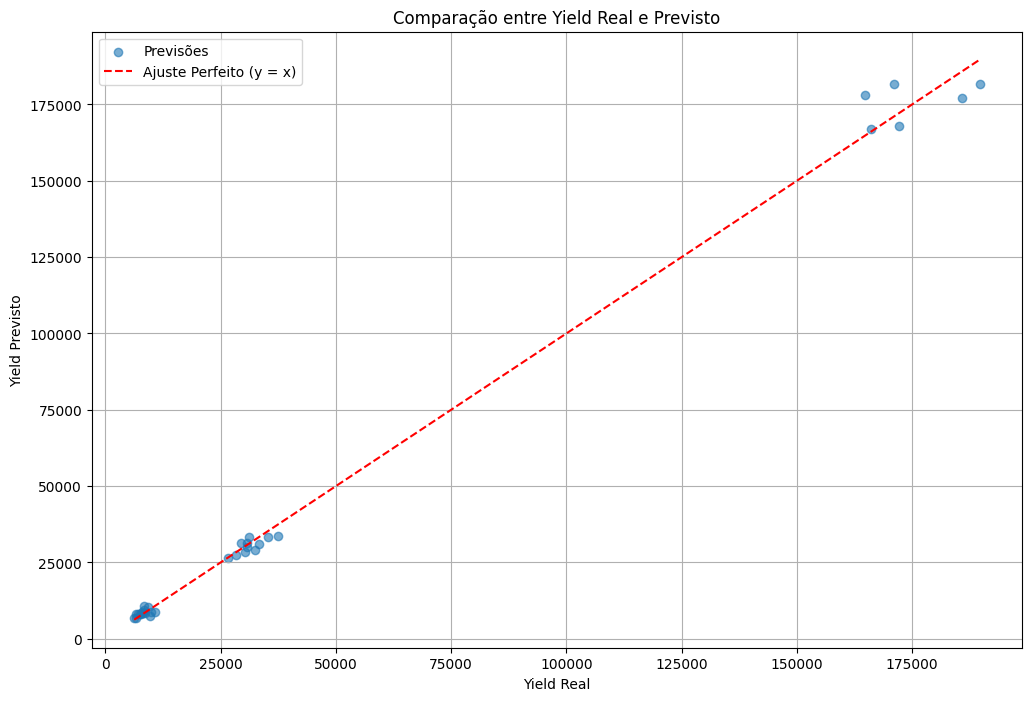

In [ ]:
# Criar gráfico de dispersão para comparar valores reais vs. previstos
plt.figure(figsize=(12, 8))

# Plotar pontos
plt.scatter(df_teste["Yield_Real"], df_teste["Yield_Previsto"], alpha=0.6, label="Previsões")

# Criar linha de ajuste perfeito (y = x)
min_val = min(df_teste["Yield_Real"].min(), df_teste["Yield_Previsto"].min())
max_val = max(df_teste["Yield_Real"].max(), df_teste["Yield_Previsto"].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle="dashed", label="Ajuste Perfeito (y = x)")

# Configurações do gráfico
plt.xlabel("Yield Real")
plt.ylabel("Yield Previsto")
plt.title("Comparação entre Yield Real e Previsto")
plt.legend()
plt.grid(True)
plt.show()

# Conclusões:

### 1. Principais Observações:


*   O rendimento agrícola se comporta de forma muito diferente das outras variáveis. Temperatura, umidade e precipitação possuem distribuições estáveis, enquanto a produtividade varia drasticamente.
*   A correlação entre os fatores climáticos e o rendimento é fraca. Isso sugere que outras variáveis, não disponíveis no dataset, podem influenciar mais a produtividade.
*   A clusterização mostrou três grupos distintos. Há culturas com o rendimento extremamente baixo, intermediário e muito alto, o que reforça a necessidade de considerar outros fatores na análise.

### 2. Limitações:


*   A base de dados não inclui fatores como tipo de solo ou práticas agrícolas, que podem ser essenciais para explicar a produtividade.
*   A alta presença de outliers no rendimento pode indicar erros ou variações extremas entre as culturas.
